In [1]:
from binance.client import Client
client = Client('ng0Zhq6ea42X3QxMV2RAubZxs508gguTISRwM13lQFFPrDDTxRiqmq3pBvIcvJMy', 'vHZDWuQvPf4mcaDvzxwRbtIWDbWuCyFyyG59bCZeTW6A6sd98qbHfCsFDVDdN3wn')

In [2]:
# fetch 1 minute klines for the last day up until now
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "36 month ago UTC")


In [3]:
unix_timestamps=[]

for kline in klines:
    unix_timestamps.append(kline[0])

In [4]:
from datetime import datetime

timestamps = []

for unix_timestamp in unix_timestamps:
    timestamps.append(datetime.fromtimestamp(unix_timestamp/1000))

In [5]:
closed_prices = []

for kline in klines:
    closed_prices.append(float(kline[4]))

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.DataFrame(closed_prices, index=timestamps, columns = ['closed_price'])

In [8]:
sma = df.rolling(window=20).mean()
rstd = df.rolling(window=20).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={'closed_price': 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={'closed_price': 'lower'})

test = df.join(upper_band)
test = test.join(lower_band)
test_plot = test.plot(kind='line')

In [9]:
ma5 = df.rolling(window=5).mean()
ma5= ma5.rename(columns={'closed_price':'ma5'})

ma30 = df.rolling(window=30).mean()
ma30= ma30.rename(columns={'closed_price':'ma30'})

ma60 = df.rolling(window=60).mean()
ma60= ma60.rename(columns={'closed_price':'ma60'})


In [10]:
test2 = pd.DataFrame
test2 = df.join(ma5)
test2 = test2.join(ma30)
test2 = test2.join(ma60)

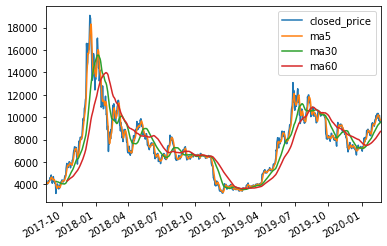

In [11]:
test2.plot()

In [12]:
test2

,closed_price,ma5,ma30,ma60
2017-08-17 09:00:00,4285.08,NaN,NaN,NaN
2017-08-18 09:00:00,4108.37,NaN,NaN,NaN
2017-08-19 09:00:00,4139.98,NaN,NaN,NaN
2017-08-20 09:00:00,4086.29,NaN,NaN,NaN
2017-08-21 09:00:00,4016.00,4127.144,NaN,NaN
...,...,...,...,...
2020-02-17 09:00:00,9706.00,10020.396,9398.808333,8564.342167
2020-02-18 09:00:00,10164.71,10007.412,9447.575333,8613.956833
2020-02-19 09:00:00,9593.79,9857.298,9479.290000,8654.974167
2020-02-20 09:00:00,9596.42,9795.638,9507.969667,8689.890500


In [12]:
klines

[[1502928000000,
  '4261.48000000',
  '4485.39000000',
  '4200.74000000',
  '4285.08000000',
  '795.15037700',
  1503014399999,
  '3454770.05073206',
  3427,
  '616.24854100',
  '2678216.40060401',
  '8733.91139481'],
 [1503014400000,
  '4285.08000000',
  '4371.52000000',
  '3938.77000000',
  '4108.37000000',
  '1199.88826400',
  1503100799999,
  '5086958.30617151',
  5233,
  '972.86871000',
  '4129123.31651808',
  '9384.14140858'],
 [1503100800000,
  '4108.37000000',
  '4184.69000000',
  '3850.00000000',
  '4139.98000000',
  '381.30976300',
  1503187199999,
  '1549483.73542151',
  2153,
  '274.33604200',
  '1118001.87008735',
  '9184.08552906'],
 [1503187200000,
  '4120.98000000',
  '4211.08000000',
  '4032.62000000',
  '4086.29000000',
  '467.08302200',
  1503273599999,
  '1930364.39032646',
  2321,
  '376.79594700',
  '1557401.33373730',
  '10125.41408414'],
 [1503273600000,
  '4069.13000000',
  '4119.62000000',
  '3911.79000000',
  '4016.00000000',
  '691.74306000',
  1503359999999